# Introducción

## Integrantes


| Nombre                          | Participación | Código     |
|---------------------------------|---------------|------------|
| Rodrigo Gabriel Amaya Mory      | 100%           | 202120725  |
| Lucia Jimena Cartagena Miranda  | 100%             | 202320133       |
| Oswaldo Alejandro Quispe Monzón | 100%             | 202320077       |
| Sergio Marcelo Ricce Abregú     | 100%           | 202110306         |
| Paolo Hurtado                   | 100%            | 202320179         |



## VARIABLES

| Variable                         | Tipo                   | Descripción                                |
|----------------------------------|------------------------|--------------------------------------------|
| id                               | Cualitativa            | Es el identificador único                        |
| name                             | Cualitativa            | Nombre de la propiedad                    |
| host_id                          | Cuantitativa Discreta  | Identificador único del anfitrión         |
| host_name                        | Cualitativa            | Nombre del anfitrión                       |
| neighbourhood_group              | Cualitativa            | Grupo de vecindarios                       |
| neighbourhood                    | Cualitativa            | Nombre del vecindario                      |
| latitude                         | Cuantitativa Continua  | Latitud geográfica                         |
| longitude                        | Cuantitativa Continua  | Longitud geográfica                        |
| room_type                        | Cualitativa            | Tipo de habitación                         |
| price                            | Cuantitativa Continua  | Precio del alquiler                        |
| minimum_nights                   | Cuantitativa Discreta  | Número mínimo de noches requeridas        |
| number_of_reviews                | Cuantitativa Discreta  | Número de reseñas                          |
| last_review                      | Cualitativa            | Fecha de la última reseña                 |
| reviews_per_month                | Cuantitativa Continua  | Número de reseñas por mes                 |
| calculated_host_listings_count   | Cuantitativa Discreta  | Cantidad de propiedades que el anfitrión gestiona |
| availability_365                 | Cuantitativa Discreta  | Disponibilidad durante 365 días           |
| number_of_reviews_ltm            | Cuantitativa Discreta  | Número de reseñas a lo largo del tiempo   |


## Contexto

Airbnb es una plataforma de alojamiento que emplea una economía colaborativa, un modelo económico empleando la tecnología para prestar, comprar, vender o compartir o alquilar bienes servicios, una alternativa a los hoteles tradicionales, de este modo, se puede reducir los gastos realizados. En este caso, nuestra población de estudio será Belice, un país de centro américa que cuenta con una población de 400 031 personas en 2021, con una actividad turística alta, debido a la diversidad de su fauna marina. Por ello, realizaremos un estudio de los alojamientos de la ciudad de Bélice, porque su población es reducida y posee bastante información acerca de alojamientos. Por ende, realizaremos un estudio empleando las variables de precio, número de reseñas, media de precios, tiempo, zona, tipo de habitación, número de estrellas, entre otros. 

# Métodos

In [3]:
#Importar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim

In [2]:
#Cargar la base de datos en un df
df = pd.read_csv("listings.csv", index_col = False)

## Limpieza de datos


In [4]:
#Utilizar las columnas necesarias
df = df[["id","price","number_of_reviews","last_review","neighbourhood","name","availability_365","host_id","room_type", "latitude","longitude"]]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3100 non-null   int64  
 1   price              3100 non-null   int64  
 2   number_of_reviews  3100 non-null   int64  
 3   last_review        2330 non-null   object 
 4   neighbourhood      3100 non-null   object 
 5   name               3100 non-null   object 
 6   availability_365   3100 non-null   int64  
 7   host_id            3100 non-null   int64  
 8   room_type          3100 non-null   object 
 9   latitude           3100 non-null   float64
 10  longitude          3100 non-null   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 266.5+ KB


Para este proyecto, cargamos listings.csv que tiene 18 columnas. Solo vamos a utilizar 11 de sus columnas para progresar. Se verifica que cada columna tenga su tipo adecuado.

In [5]:
df.tail(5)

,id,price,number_of_reviews,last_review,neighbourhood,name,availability_365,host_id,room_type,latitude,longitude
3095,979088845313929626,66,0,NaN,Toledo Mainland,Cabin in Yemeri Grove · ★New · 1 bedroom · 2 b...,269,150789,Private room,16.161079,-88.874180
3096,979657301560948512,1686,0,NaN,Belize Islands,Cabin in San Pedro · ★New · Studio · 2 baths,7,55997332,Private room,17.921394,-87.960042
3097,980639968759012759,186,0,NaN,Cayo,Home in Spanish Lookout · ★New · 2 bedrooms · ...,269,234363583,Entire home/apt,17.243793,-89.029992
3098,983265546231090140,353,0,NaN,Cayo,Home in Calla Creek · ★New · 1 bedroom · 2 bed...,364,408053114,Entire home/apt,17.155715,-89.133064
3099,984345079968281304,121,0,NaN,Cayo,Home in San Ignacio · ★New · 3 bedrooms · 4 be...,270,462323256,Entire home/apt,17.154598,-89.078015


In [10]:
def EnPais(coords):

    geolocalizar = Nominatim(user_agent="GeoLoc")
    #geolocalizar = geolocalizar.geocode(coords)
    locname = geolocalizar.reverse(coords)
    #return geolocalizar.raw["display_name"][-6:]
    return locname.raw["display_name"][-6:]

Acá comprobamos el país de las propiedades. En la función EnPais, veremos si el país de cada propiedad es Belice.

In [11]:
df["coords"] = (df["latitude"].astype(str) + "," + df["longitude"].astype(str)).astype(str)

df["pais"] = df["coords"].apply(lambda x: EnPais(x))
df.head(2)


,id,price,number_of_reviews,last_review,neighbourhood,name,availability_365,host_id,room_type,latitude,longitude,coords,pais
0,36690,91,409,2023-09-20,Belize Islands,Tiny home in Caye Caulker · ★4.82 · 1 bed · 1 ...,165,157752,Entire home/apt,17.74832,-88.02474,"17.74832,-88.02474",Belize
1,120115,603,56,2023-05-20,Belize Islands,Condo in Caye Caulker Village · ★4.85 · 2 bed...,235,604999,Entire home/apt,17.74166,-88.02395,"17.74166,-88.02395",Belize


A cada propiedad, se le asignan coordenadas (coords) que son la latitud y longitud unidos en un string, y con estas coordenadas, se obtiene su país.

In [ ]:
df.to_csv("Airbnb_Belize.csv", index = False)

La verificación del país de las propiedades dura más de 30 minutos, por lo que el df obtenido anteriormente, fue convertido a csv con el fin de usar los datos de forma más rápido en el futuro.

In [4]:
df = pd.read_csv("Airbnb_Belize.csv", index_col = False)
df["pais"].value_counts()

Belize    3099
temala       1
Name: pais, dtype: int64

Leemos el nuevo csv y contamos las propiedades.

In [5]:
df = df[df.pais == "Belize"]
len(df)

3099

Se observan valores distintos a Belize con el .value_counts(). Solo buscamos contar los que son de Belize. Serían un total de 3099 propiedades.

In [6]:
#Verificar el total de valores nulos por columna
df.isnull().sum()

id                     0
price                  0
number_of_reviews      0
last_review          770
neighbourhood          0
name                   0
availability_365       0
host_id                0
room_type              0
latitude               0
longitude              0
coords                 0
pais                   0
dtype: int64

Existen 770 datos nulos en last_review, lo que significa que sus establecimientos no recibieron reseñas.

In [7]:
df = df[((df["price"] < 3000) & (df["number_of_reviews"] > 0))]
print(df.isnull().sum())
print("Cantidad de datos: ",len(df))

id                   0
price                0
number_of_reviews    0
last_review          0
neighbourhood        0
name                 0
availability_365     0
host_id              0
room_type            0
latitude             0
longitude            0
coords               0
pais                 0
dtype: int64
Cantidad de datos:  2321


Se decidió eliminar los valores cuyo precio sea más de 3000 dolares beliceños y cuyas reseñas sean 0. Se puede observar como ya no hay valores nulos en last_review. Los valores ahora disponibles son 2321.

In [8]:
df.drop(["coords", "pais"], axis = 1).head(1)

,id,price,number_of_reviews,last_review,neighbourhood,name,availability_365,host_id,room_type,latitude,longitude
0,36690,91,409,2023-09-20,Belize Islands,Tiny home in Caye Caulker · ★4.82 · 1 bed · 1 ...,165,157752,Entire home/apt,17.74832,-88.02474


Una vez tenemos los datos limpios, quitamos las columnas que no se utilizarán (coords y pais).

## Métodos Gráficos:


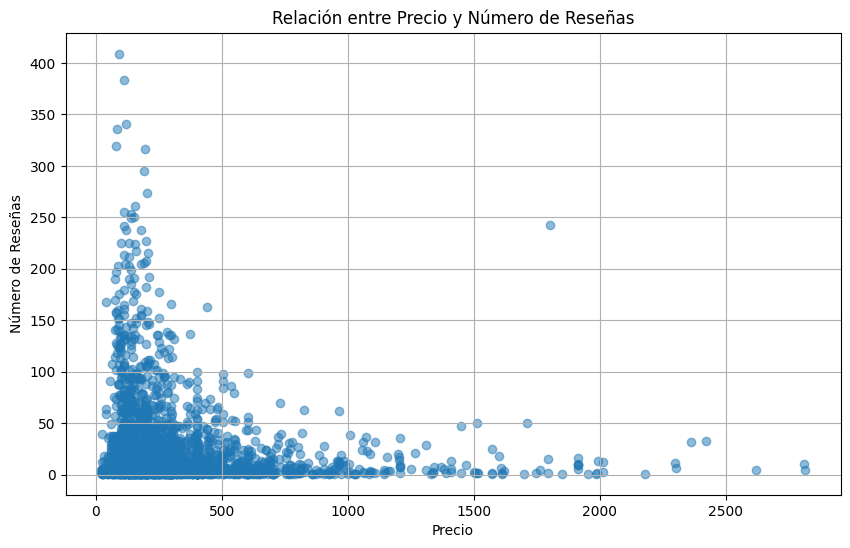

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['number_of_reviews'], alpha=0.5)
plt.title('Relación entre Precio y Número de Reseñas')
plt.xlabel('Precio')
plt.ylabel('Número de Reseñas')
plt.grid(True)

plt.show()

A medida que los precios aumentan, las propiedades tienden a recibir menos reseñas, mientras que las opciones más económicas atraen un mayor número de opiniones de los huéspedes.

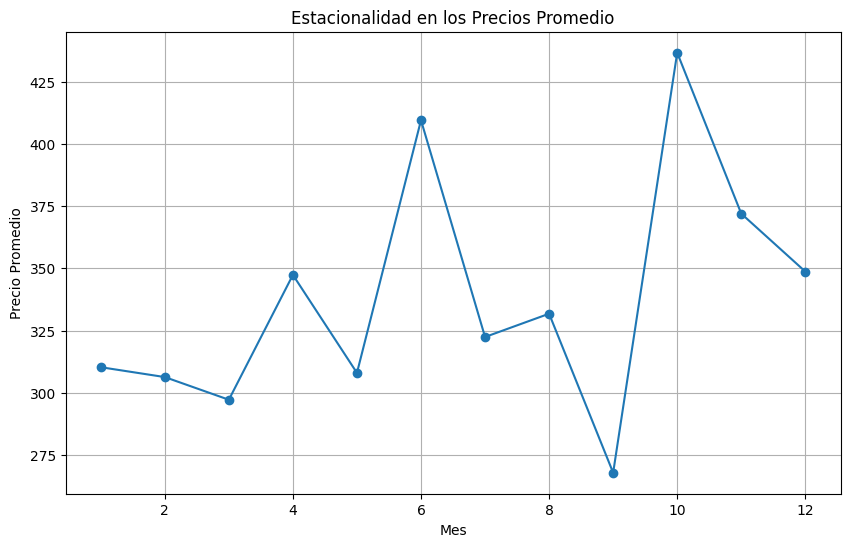

In [10]:
df['last_review'] = pd.to_datetime(df['last_review'])

df['mes'] = df['last_review'].dt.month

# Calcula el precio promedio por mes
precio_promedio_por_mes = df.groupby('mes')['price'].mean()

# Crea un gráfico de línea para mostrar la estacionalidad en los precios
plt.figure(figsize=(10, 6))
plt.plot(precio_promedio_por_mes, marker='o')
plt.title('Estacionalidad en los Precios Promedio')
plt.xlabel('Mes')
plt.ylabel('Precio Promedio')
plt.grid(True)

# Muestra el gráfico
plt.show()

De acuerdo al gráfico, los precios promedio tienden a ser más bajos en setiembre y alcanzan su punto máximo en octubre en Belize.

C:\Users\ASUS.LAPTOP-E2BE879H\AppData\Local\Temp\ipykernel_1520\2285153763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='neighbourhood', order=df['neighbourhood'].value_counts().index, palette='viridis')


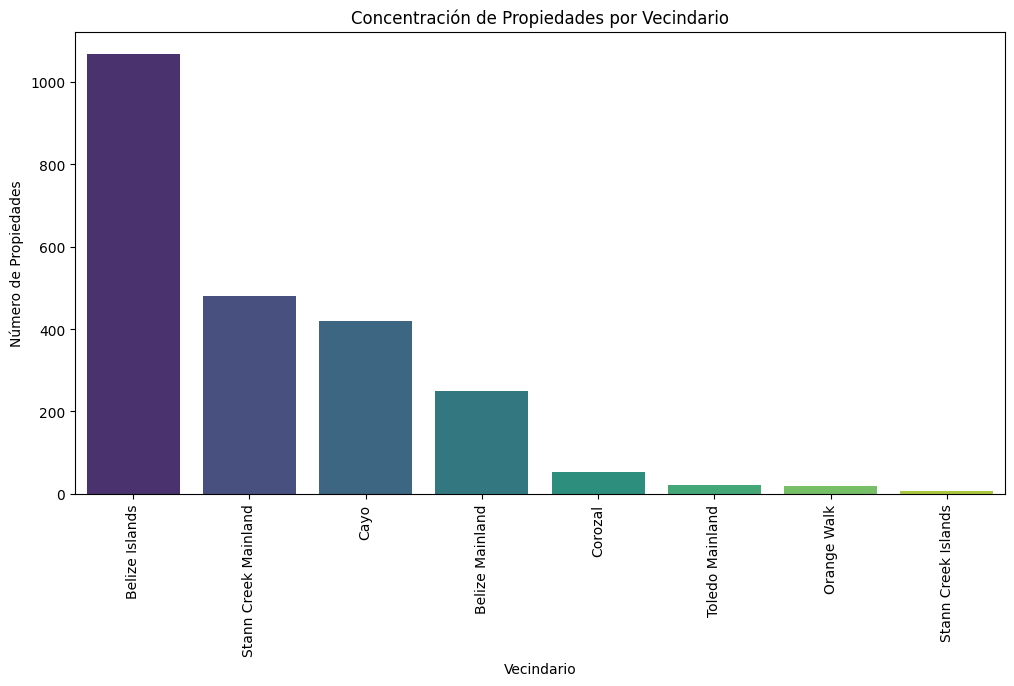

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='neighbourhood', order=df['neighbourhood'].value_counts().index, palette='viridis')
plt.title('Concentración de Propiedades por Vecindario')
plt.xlabel('Vecindario')
plt.ylabel('Número de Propiedades')
plt.xticks(rotation=90)
plt.show()

Belize Islands lidera en cantidad de propiedades, mientras que Stann Creek Islands cuenta con la menor cantidad de propiedades en comparación.

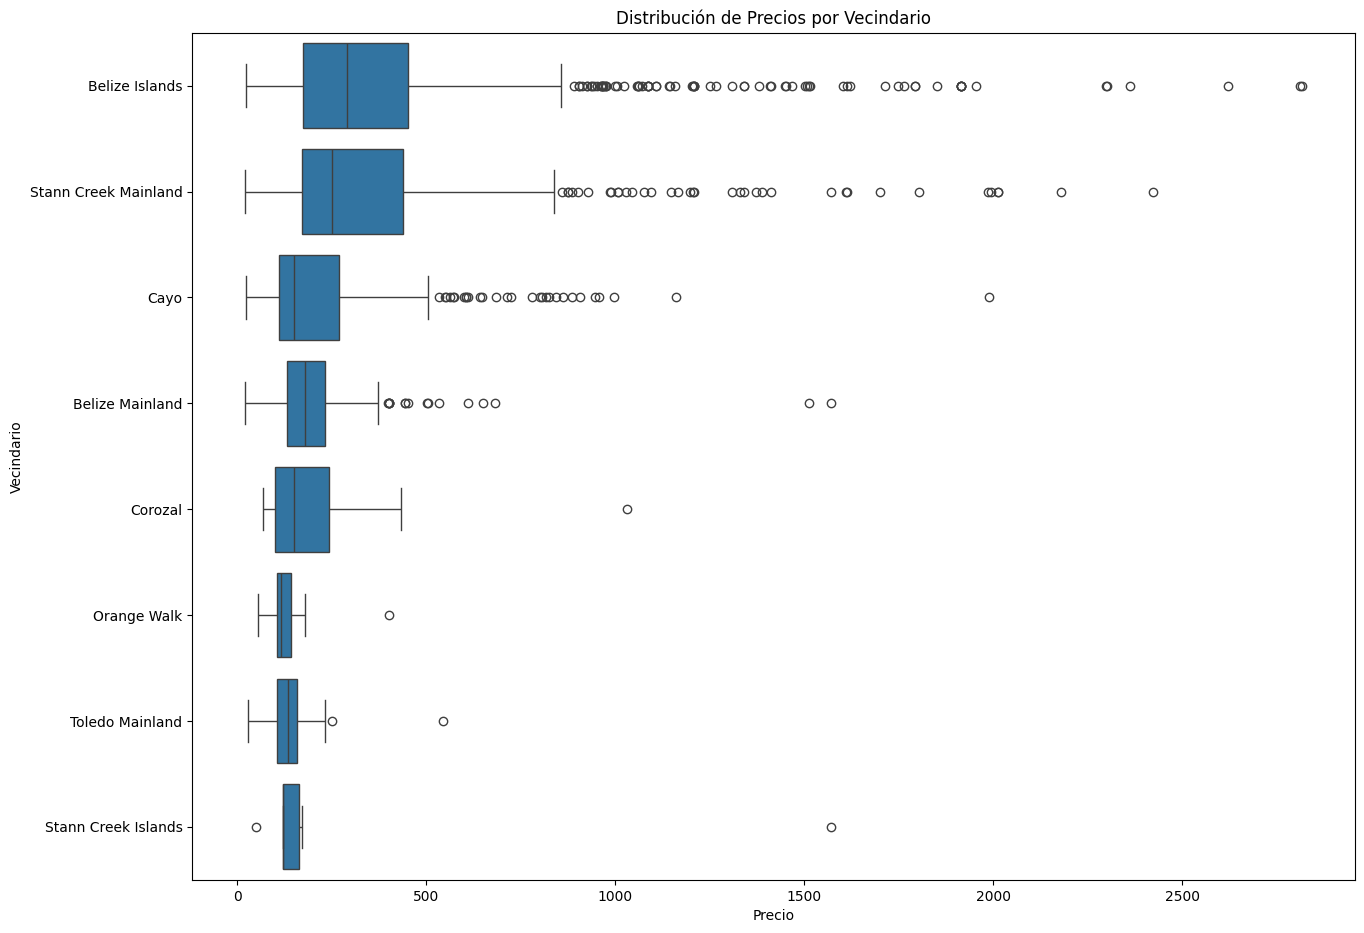

In [13]:
# Crea un gráfico de boxplot para los precios por vecindario
plt.figure(figsize=(15, 11))
sns.boxplot(data=df, x='price', y='neighbourhood', orient='h')
plt.title('Distribución de Precios por Vecindario')
plt.xlabel('Precio')
plt.ylabel('Vecindario')
plt.show()

Se puede observar que en el vecindario Corozal los datos no se encuentran muy dispersos, por otro lado Belize Islands sus datos están muy dispersos, y tiene la habitación mas cara.

<Axes: xlabel='neighbourhood', ylabel='price'>

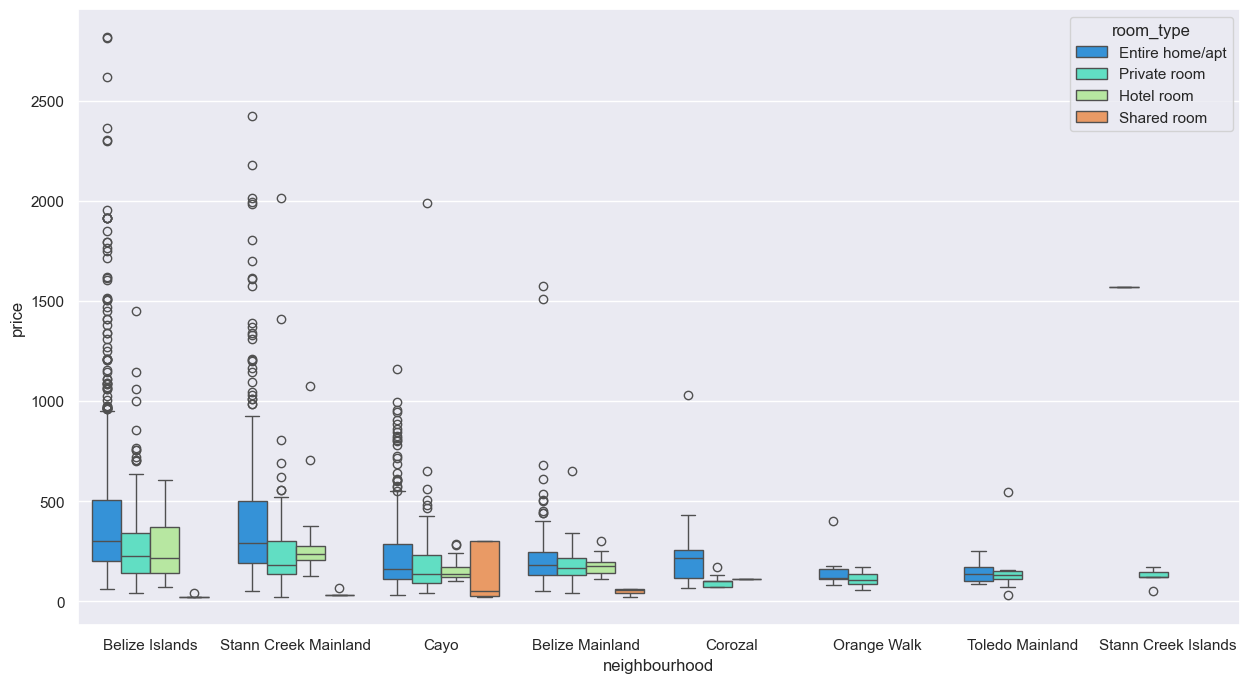

In [26]:
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(data=df, x = "neighbourhood", y = "price", hue = "room_type", palette = 'rainbow')

Acá tenemos la relación de vecindarios y tipos de cuartos, con respecto al precio. Hay demasiadas propiedades en Belize Islands y por Stann Creek Mainland, que tienen acceso al mar. La menor cantidad de shared rooms puede indicar que la gente va a esos lugares más para pasar sus vacaciones en paz. Según la declaración de Benjamin, a él le interesaba Belize por su flora y fauna marina, por lo que es probable que la gente vaya a esos lugares por la misma razón. Y están dispuestos a pagar por estar en esos lugares a pesar de no ser los más baratos. Esto último se puede analizar mediante la anterior heatmap de correlación entre precio y número de reseñas, y como hay varias viviendas que no son muy caras, estas pueden tener una ligera mayor cantidad de reseñas, lo que significa, más visitas.
Corozal es un lugar con acceso al mar también, la razón por la que no tiene muchas propiedades es porque el vecindario es muy pequeño.

## Métodos no Gráficos

In [14]:
precio_promedio = df['price'].mean()
precio_mediana = df['price'].median()
print(f"Precio Promedio: {precio_promedio}")
print(f"Precio Mediana: {precio_mediana}\n")

# Calcula el precio promedio por tipo de habitación
precio_promedio_por_tipo = df.groupby('room_type')['price'].mean().reset_index()
print(precio_promedio_por_tipo)


Precio Promedio: 322.56311934510984
Precio Mediana: 228.0

         room_type       price
0  Entire home/apt  364.849568
1       Hotel room  235.635514
2     Private room  228.726316
3      Shared room   58.909091


Hay una gran diferencia de precio entre un cuarto compartido y el alquiler de una casa completa.

In [15]:
# Ordena el DataFrame por el número de reseñas en orden descendente
hospedajes_populares = df.sort_values(by='number_of_reviews', ascending=False)

top_10_hospedajes = hospedajes_populares.head(10)
print(top_10_hospedajes[['name', 'number_of_reviews']])

                                                  name  number_of_reviews
0    Tiny home in Caye Caulker · ★4.82 · 1 bed · 1 ...                409
305  Cottage in San Ignacio · ★4.95 · 1 bedroom · 1...                383
462  Rental unit in Belize City · ★4.89 · 1 bedroom...                341
332  Cabin in San Ignacio · ★4.94 · 1 bedroom · 1 b...                336
470  Cabin in San Ignacio · ★4.92 · 2 bedrooms · 2 ...                319
167  Home in Ladyville · ★4.91 · 2 bedrooms · 2 bed...                316
230  Home in Caye Caulker · ★4.92 · 1 bedroom · 1 b...                295
42   Guesthouse in San Pedro · ★4.82 · 1 bedroom · ...                274
40   Rental unit in Caye Caulker · ★4.96 · Studio ·...                261
175  Cabin in Belize District · ★4.80 · 1 bedroom ·...                255


Estamos relacionando la cantidad de reseñas con la popularidad del lugar, en este caso listamos el top 10 de los cuartos con mayores reseñas.

In [16]:
# Agrupa los datos por vecindario y calcula la disponibilidad promedio
disponibilidad_promedio_por_vecindario = df.groupby('neighbourhood')['availability_365'].mean().reset_index()

print(disponibilidad_promedio_por_vecindario)

          neighbourhood  availability_365
0        Belize Islands        268.031835
1       Belize Mainland        271.624000
2                  Cayo        260.921429
3               Corozal        262.547170
4           Orange Walk        307.200000
5   Stann Creek Islands        214.000000
6  Stann Creek Mainland        258.326403
7       Toledo Mainland        216.636364


En este caso el valor entero representa el número de días completos que las propiedades están disponibles para alquilar en promedio durante un año.
Cabe resultar que hay algunas propiedades donde existe una disponibilidades de 365 dias para reservar, y otras que por el contrario tiene 0 dias para hacer reserva.

In [18]:
# Calcula la correlación entre el precio y el número de reseñas
correlacion = df['price'].corr(df['number_of_reviews'])

# Calcula la covarianza entre el precio y el número de reseñas
covarianza = df['price'].cov(df['number_of_reviews'])

print(f"Correlación: {correlacion}")
print(f"Covarianza: {covarianza}")


Correlación: -0.1632403939815445
Covarianza: -2189.3066946842173


Comparación entre dos variables cuantitativas

In [19]:
tabla_cruzada = pd.crosstab(df['room_type'], df['neighbourhood'])

# Muestra la tabla de tabulación cruzada
print(tabla_cruzada)

neighbourhood    Belize Islands  Belize Mainland  Cayo  Corozal  Orange Walk  \
room_type                                                                      
Entire home/apt             802              138   272       38           13   
Hotel room                   44               20    20        1            0   
Private room                214               88   123       14            7   
Shared room                   8                4     5        0            0   

neighbourhood    Stann Creek Islands  Stann Creek Mainland  Toledo Mainland  
room_type                                                                    
Entire home/apt                    1                   345               13  
Hotel room                         0                    22                0  
Private room                       6                   109                9  
Shared room                        0                     5                0  


Aqui estamos comparando 2 variables categóricas, con esta tabla de tabulación cruzada podemos ver que en el vecindario Belize Islandas existe una mayor cantidad del tipo de habitacion casa completa, por otro lado vemos que hay muchos vecindarios con 0 en ciertos tipos de habitación, siendo habitación compartida el que aparece en muy pocos vecindarios.

## Mapas

In [77]:
#Crear el mapa de Belize
map = folium.Map(location=[17.2510, -88.7590], zoom_start=8)
map

In [80]:
from folium.plugins import FastMarkerCluster
locations = list(zip(df.latitude, df.longitude))

FastMarkerCluster(data=locations).add_to(map)
map

Con este mapa, podemos observar las ubicaciones de las propiedades Airbnb en Belize.

In [81]:
from folium.plugins import HeatMap
mapheat = folium.Map(location=[17.2510, -88.7590], zoom_start=8)
heat_data = [[row['latitude'], row['longitude']] for i, row in df.iterrows()]

HeatMap(heat_data).add_to(mapheat)
mapheat


Con este heatmap, se puede observar la distribución de propiedades en Belize.

# Conclusión

En conclusión, los resultados del análisis de datos concluyen que los factores de precio y locación son realmente influyentes con respecto al resto de variables, puesto que, afectan en gran medida las desiciones del consumidor. Esto se evidencia mediante el web scraping, dando como resultado que el precio tiene una correlación ligeramente negativa con respecto el número de reseñas, a menor sea el precio, más reseñas tiene; asímismo, la variabilidad del precio con respecto al mes del año. Mientras que, la locación se encuentra relacionada con el número de alojamientos, puesto que, mientras más comercial sea una zona resulta más rentable tener propiedades en esa zona; por otro lado, la locación también se relaciona con la variabilidad del precio en un alojamiento, considerando que, a más solicitado sea un lugar, más está dispuesto a pagar el consumidor. En síntesis, el web scraping resulta de gran utilidad para realizar un análisis exploratorio del mercado y la información que nos proporciona, de esta forma se puede realizar un análisis y destacar algunos resultados, como la gran influencia de la variable precio y locación en la opinión de los consumidores.